In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test=  pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

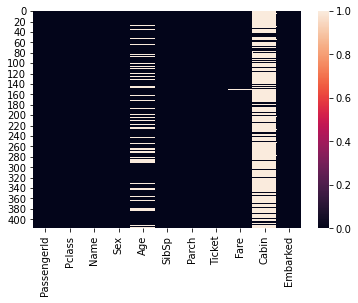

In [4]:
sns.heatmap(test.isnull())

In [5]:
df=test.copy()

In [6]:
df.drop('Cabin',axis=1,inplace=True)

In [7]:
print(df['Age'].median())
df['Age'].fillna(df['Age'].median(),inplace=True)

27.0


In [8]:
print(df['Fare'].median())
df['Fare'].fillna(df['Fare'].median(),inplace=True)

14.4542


# Encoding

In [9]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [10]:
df2=df.copy()

In [11]:
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [12]:
df2=pd.get_dummies(data=df2,columns=['Sex','Embarked'],drop_first=True)

In [13]:
df2

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,27.0,0,0,8.0500,1,0,1


# Feature Scaling

In [14]:
df3=df2.copy()

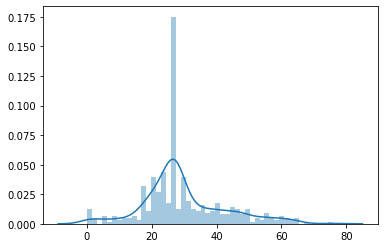

In [15]:
sns.distplot(df3[['Age']],bins=50)

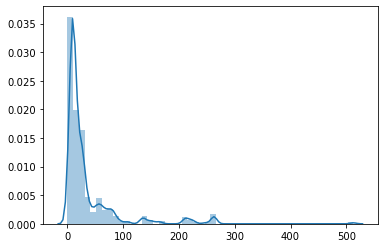

In [16]:
sns.distplot(df3[['Fare']],bins=50)

In [17]:
df3.skew()

Pclass       -0.534170
Age           0.660747
SibSp         4.168337
Parch         4.654462
Fare          3.692299
Sex_male     -0.568991
Embarked_Q    2.501094
Embarked_S   -0.612505
dtype: float64

In [18]:
X=df3

In [19]:
from sklearn.preprocessing import StandardScaler
minmax_scaler= StandardScaler()
scaled_X= minmax_scaler.fit_transform(X)

In [20]:
scaled_X=pd.DataFrame(scaled_X,columns=X.columns)
scaled_X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.873482,0.386231,-0.499470,-0.400248,-0.497413,0.755929,2.843757,-1.350676
1,0.873482,1.371370,0.616992,-0.400248,-0.512278,-1.322876,-0.351647,0.740370
2,-0.315819,2.553537,-0.499470,-0.400248,-0.464100,0.755929,2.843757,-1.350676
3,0.873482,-0.204852,-0.499470,-0.400248,-0.482475,0.755929,-0.351647,0.740370
4,0.873482,-0.598908,0.616992,0.619896,-0.417492,-1.322876,-0.351647,0.740370
...,...,...,...,...,...,...,...,...
413,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,0.755929,-0.351647,0.740370
414,-1.505120,0.740881,-0.499470,-0.400248,1.314435,-1.322876,-0.351647,-1.350676
415,0.873482,0.701476,-0.499470,-0.400248,-0.507796,0.755929,-0.351647,0.740370
416,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,0.755929,-0.351647,0.740370


In [21]:
scaled_X.to_csv("test_cleaned.csv")

# Feature Selection